In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication2

In [3]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 1  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.1  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 40  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

# TODO: end and stop from updating when population becomes too small

# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)

for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)

y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>)

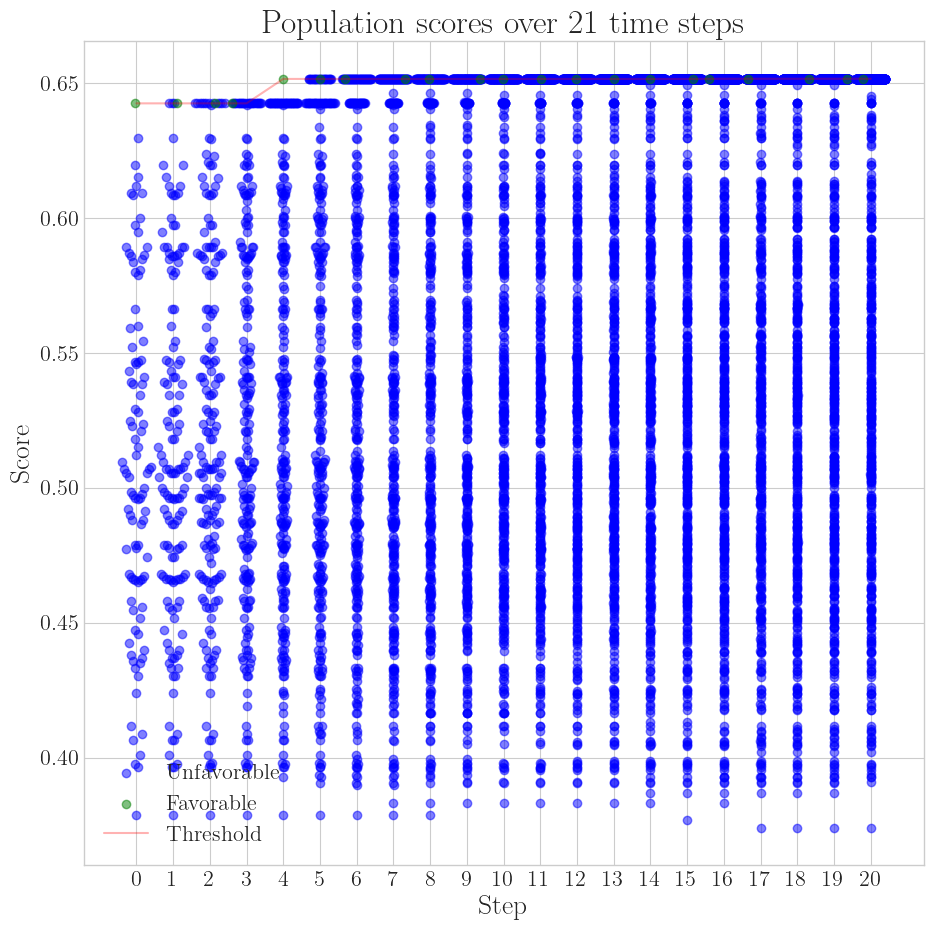

In [5]:
environment.plot.agent_scores()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population at t=3'}, xlabel='f_0', ylabel='f_1'>)

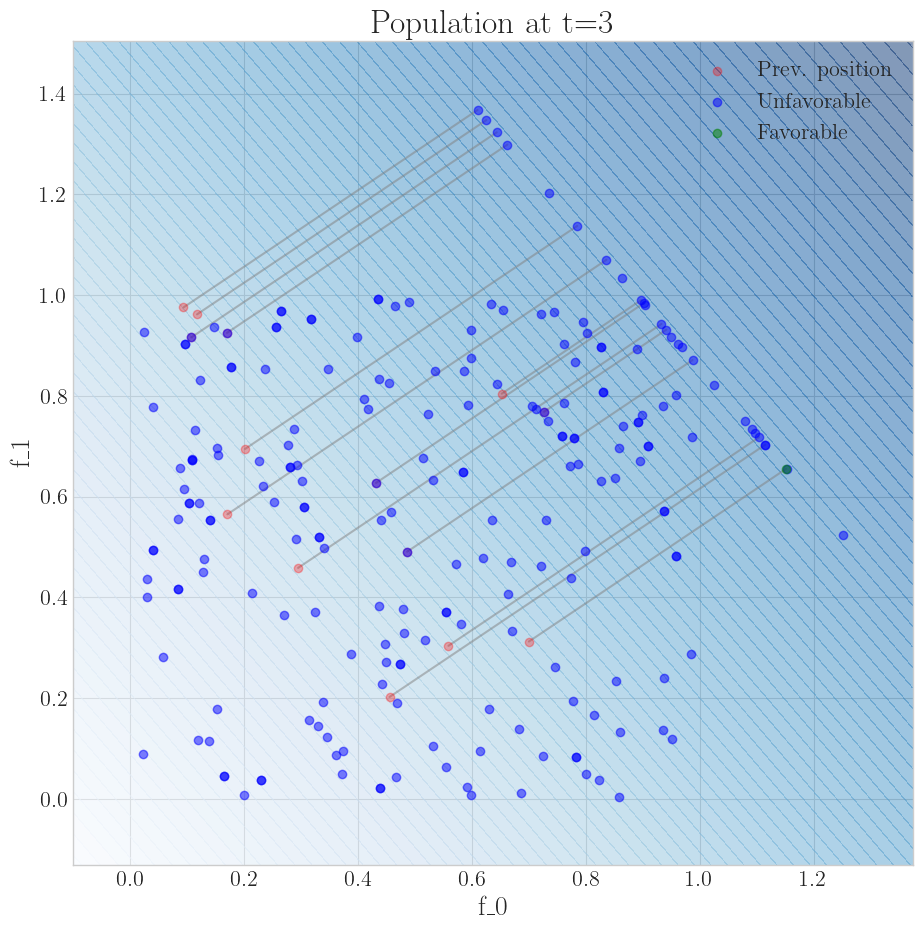

In [6]:
environment.plot.scatter(3)

(array([ 4.,  5., 12., 14., 20., 10., 13., 11.,  8.,  3.]),
 array([0.37874517, 0.40511149, 0.43147781, 0.45784413, 0.48421045,
        0.51057677, 0.53694309, 0.56330941, 0.58967573, 0.61604205,
        0.64240837]),
 <BarContainer object of 10 artists>)

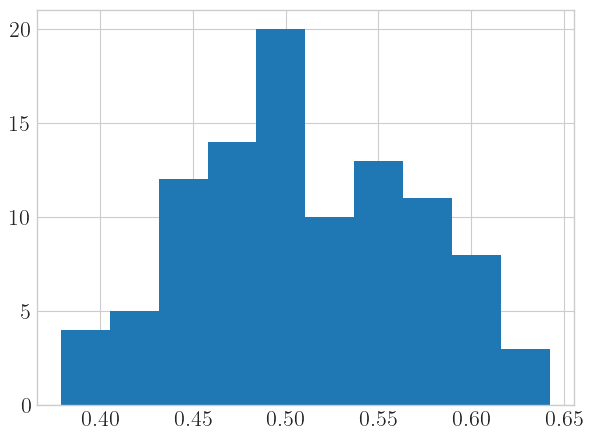

In [7]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

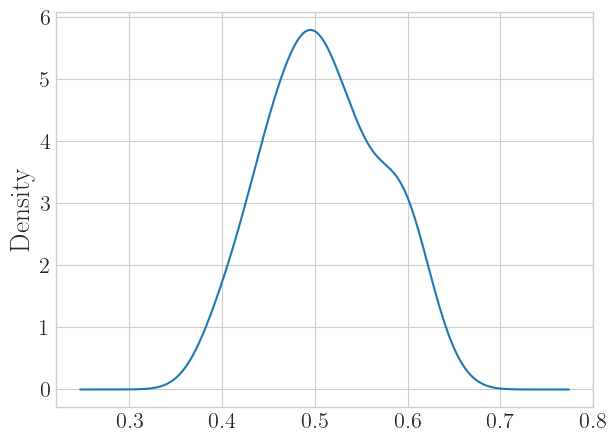

In [8]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

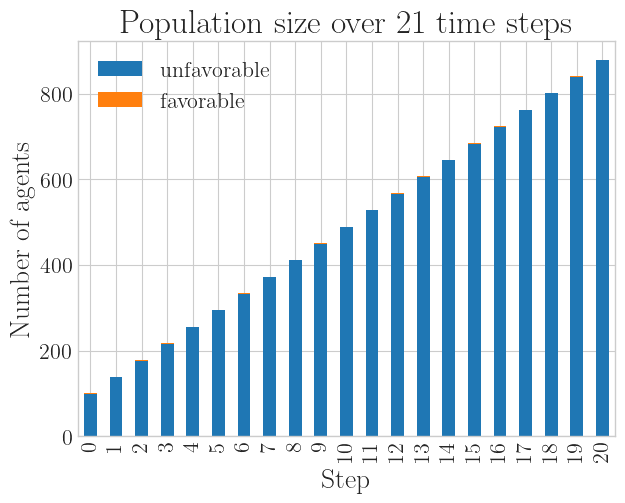

In [9]:
environment.plot.population_size()

In [10]:
environment.success_rate(1, 20)

array([0.25      , 0.1       , 0.07692308, 0.        , 0.03571429,
       0.03225806, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.        , 0.        ,
       0.        , 0.01052632, 0.01515152, 0.        ])

In [11]:
environment.threshold_drift(1, 20)

array([0.00000000e+00, 0.00000000e+00, 1.72822004e-16, 1.40953524e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.27886388e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [12]:
environment.agent_performance().n_failures.max()

4